In [ ]:
library(terra)
library(sf)
library(tidyterra)
library(MultiscaleDTM)
library(randomForest)
library(caret)
library(vip)
library(rstac)


s_obj <- stac("https://planetarycomputer.microsoft.com/api/stac/v1/")

In [28]:
wa_eco <- vect("data/wa_l3_eco//wa_eco_l3.shp") |> 
    terra::project("EPSG:4326")
terra::ext(wa_eco)
wa_eco[1]

SpatExtent : -124.733170942523, -116.915582333433, 45.543541638577, 49.0024939377472 (xmin, xmax, ymin, ymax)

 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 1, 13  (geometries, attributes)
 extent      : -124.7332, -122.8495, 46.0966, 48.39173  (xmin, xmax, ymin, ymax)
 coord. ref. : lon/lat WGS 84 (EPSG:4326) 
 names       : US_L3CODE   US_L3NAME NA_L3CODE   NA_L3NAME NA_L2CODE
 type        :     <chr>       <chr>     <chr>       <chr>     <chr>
 values      :         1 Coast Range     7.1.8 Coast Range       7.1
       NA_L2NAME NA_L1CODE       NA_L1NAME STATE_NAME EPA_REGION (and 3 more)
           <chr>     <chr>           <chr>      <chr>      <int>             
 MARINE WEST CO~         7 MARINE WEST CO~ Washington         10             

In [29]:
it_obj <- s_obj |> 
    stac_search(collections = "nasadem",
                bbox = c(-124.733170942523, 45.543541638577,-116.915582333433,49.0024939377472)) |>
    get_request()

print(it_obj)

###STACItemCollection
- features (45 item(s)):
  - NASADEM_HGT_n49w125
  - NASADEM_HGT_n49w124
  - NASADEM_HGT_n49w123
  - NASADEM_HGT_n49w122
  - NASADEM_HGT_n49w121
  - NASADEM_HGT_n49w120
  - NASADEM_HGT_n49w119
  - NASADEM_HGT_n49w118
  - NASADEM_HGT_n49w117
  - NASADEM_HGT_n48w125
  - ... with 35 more feature(s).
- assets: elevation, rendered_preview, tilejson
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [20]:
it_obj$features[[3]]

###STACItem
- id: NASADEM_HGT_n48w123
- collection: nasadem
- bbox: 
xmin: -123.00014, ymin: 47.99986, xmax: -121.99986, ymax: 49.00014
- datetime: 2000-02-20T00:00:00Z
- assets: elevation, rendered_preview, tilejson
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type

In [26]:
wa_eco_dem1 <- rast(it_obj$features[[1]]$assets$elevation$href)
wa_eco_dem2 <- rast(it_obj$features[[2]]$assets$elevation$href)

wa_eco_dem_cmb <- terra::mosaic(wa_eco_dem1, wa_eco_dem2)

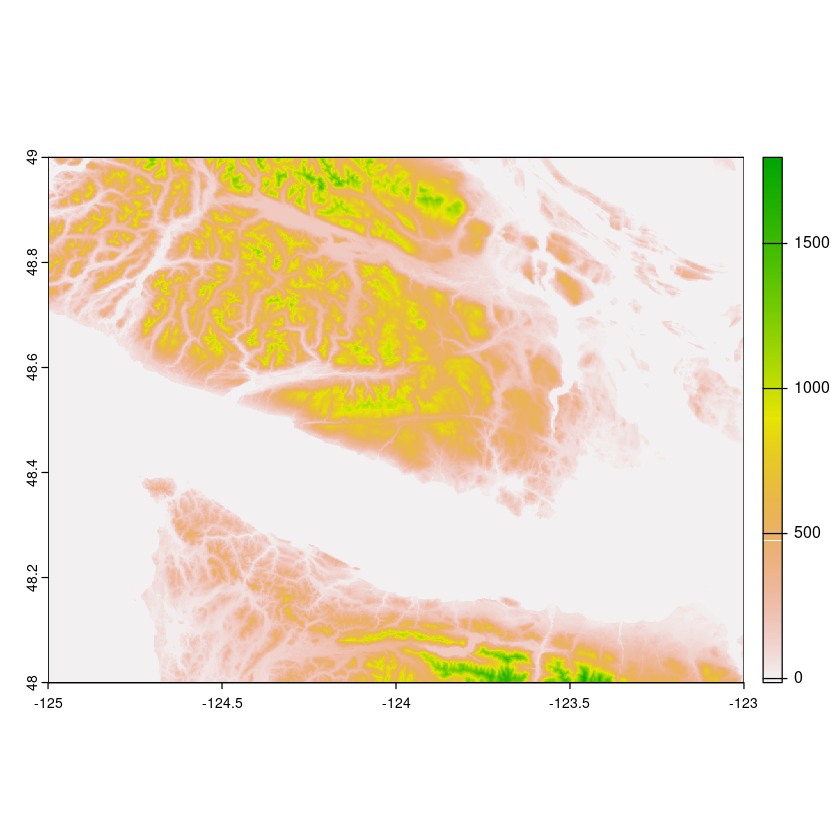

In [27]:
plot(wa_eco_dem_cmb)

In [30]:
wa_eco_dem_cmb

class       : SpatRaster 
dimensions  : 3601, 7201, 1  (nrow, ncol, nlyr)
resolution  : 0.0002777778, 0.0002777778  (x, y)
extent      : -125.0001, -122.9999, 47.99986, 49.00014  (xmin, xmax, ymin, ymax)
coord. ref. : lon/lat WGS 84 (EPSG:4326) 
source(s)   : memory
varname     : NASADEM_HGT_n48w125 
name        : NASADEM_HGT_n48w125 
min value   :                 -24 
max value   :                1810 

In [31]:
print("hi")

[1] "hi"
